# Template for Problem 2 (HW 3)

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
data = scipy.io.loadmat('mnist.mat')

In [3]:
ytrain  = data['ytrain']
xtrain  = data['xtrain']
ytest   = data['ytest']
xtest   = data['xtest']
yval    = data['yval']
xval    = data['xval']

In [4]:
# Define predictions
def pred(theta, X):
	# write here
  	return np.sign(np.dot(X, theta))

In [5]:
# Computes the accuracy on a test dataset
def accuracy(X, y, theta):

  # write here
  y_pred = pred(theta, X)
  y = y.flatten()
  return np.mean(y_pred == y)

In [6]:
# Runs the SSGD on SVM objective taking in an initial weight vector
# theta0, matrix of covariates Xtrain, a vector of labels ytrain.
# 'tot_iter' is the number of passes to be made through the data.
# lbda is the regularization parameter.
# Outputs the learned weight vector theta.
def train(theta0, Xtrain, ytrain, tot_iters, lamda):

  # write here
  train_accuracies = []
  test_accuracies = []
  theta = theta0
  N = Xtrain.shape[0]
  np.random.seed(0)
  for j in range(1,tot_iters+1):
    i = np.random.randint(0, N)
    eta_t = 1/(lamda*j)
    if ytrain[i]*np.dot(Xtrain[i], theta) < 1:
      theta = (1-eta_t*lamda)*theta + eta_t*ytrain[i]*Xtrain[i]
    else:
      theta = (1-eta_t*lamda)*theta
      
    if tot_iters//N == 200:
      if j%N == 0:
        train_accuracies.append(accuracy(Xtrain, ytrain, theta))
        test_accuracies.append(accuracy(xtest, ytest, theta))
  
  return theta, train_accuracies, test_accuracies


In [7]:
# Get training and testing data
# training
N, p      = np.shape(data['xtrain'])
theta0    = np.zeros(p) # or random initialization
tot_iter  = 40*N
lamda     = 10.0
theta     = train(theta0, data['xtrain'], data['ytrain'], tot_iter, lamda)[0]

# evaluation
print('Train Accuracy: {0}%, Test Accuracy: {1}%'.format(100*accuracy(data['xtrain'], data['ytrain'], theta), 100*accuracy(data['xtest'], data['ytest'], theta)))

Train Accuracy: 79.515%, Test Accuracy: 79.66%


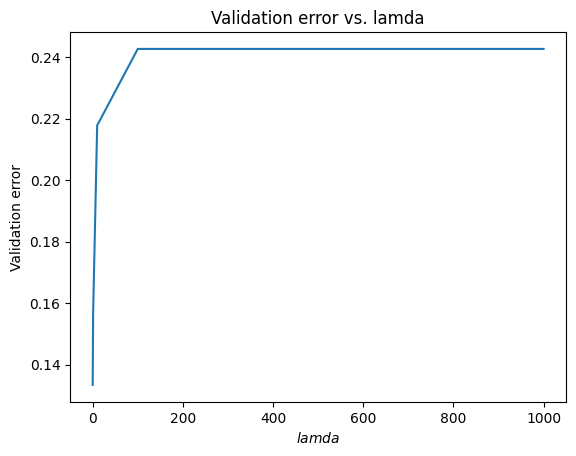

In [8]:
# Find best lamda using validation and put the results in 
Lamda = [0.1,1,10,100,1000]
error = []
for lamda in Lamda:
  theta = train(theta0, data['xtrain'], data['ytrain'], tot_iter, lamda)[0]
  error.append(1-accuracy(data['xval'], data['yval'], theta))
  
plt.plot(Lamda, error)
plt.title('Validation error vs. lamda')
plt.xlabel('$lamda$')
plt.ylabel('Validation error')
plt.show()

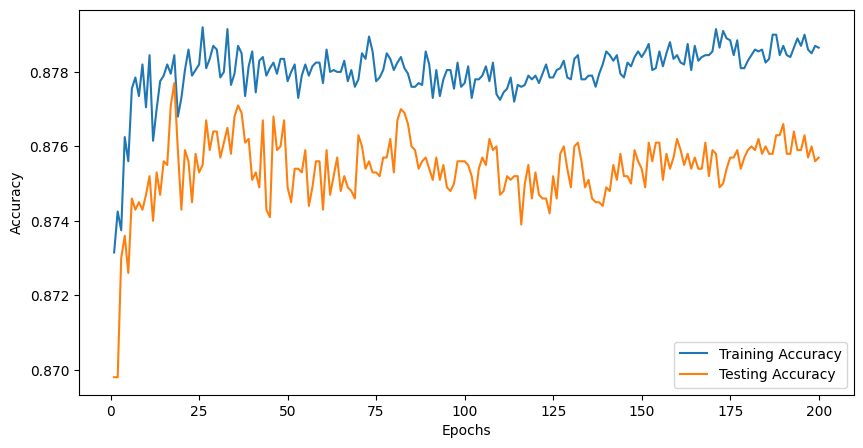

In [9]:
# lambda with the least validation error
min_error_index = error.index(min(error))
best_lambda = Lamda[min_error_index]

N, p = np.shape(data['xtrain'])
epochs = 200
Epoch = np.arange(1,epochs+1)
theta0 = np.zeros(p)
model = train(theta0, data['xtrain'], data['ytrain'], epochs*N, best_lambda)

train_accuracies = model[1]
test_accuracies = model[2]

# Plot the accuracies
plt.figure(figsize=(10, 5))
plt.plot(Epoch, train_accuracies, label='Training Accuracy')
plt.plot(Epoch, test_accuracies, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [10]:
print('Train Accuracy: {0}%, Test Accuracy: {1}%'.format(train_accuracies[-1]*100, test_accuracies[-1]*100))

Train Accuracy: 87.86500000000001%, Test Accuracy: 87.57000000000001%
